In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as pl
%matplotlib inline

Dowload LifeExpectancy.csv from the course webpage, and read it into Python, skipping the necessary rows and reading the header. Make the country name be an index. Print the first few rows to ensure that you have it correct. [2 marks]

In [71]:
life = pd.read_csv('/Users/marslast/Dropbox/Transfer/Teaching/DATA201/Datasets/LifeExpectancy.csv',skiprows=4,index_col=0,header=[0])
life.head()

,Country Code,Indicator Name,Indicator Code,1960,1961,1962,1963,1964,1965,1966,...,2010,2011,2012,2013,2014,2015,2016,2017,2018,2019
Country Name,,,,,,,,,,,,,,,,,,,,,
Aruba,ABW,"Life expectancy at birth, total (years)",SP.DYN.LE00.IN,65.662,66.074,66.444,66.787,67.113,67.435,67.762,...,75.017,75.158,75.299,75.441,75.583,75.725,75.868,76.010,NaN,NaN
Afghanistan,AFG,"Life expectancy at birth, total (years)",SP.DYN.LE00.IN,32.446,32.962,33.471,33.971,34.463,34.948,35.430,...,61.028,61.553,62.054,62.525,62.966,63.377,63.763,64.130,NaN,NaN
Angola,AGO,"Life expectancy at birth, total (years)",SP.DYN.LE00.IN,37.524,37.811,38.113,38.430,38.760,39.102,39.454,...,55.350,56.330,57.236,58.054,58.776,59.398,59.925,60.379,NaN,NaN
Albania,ALB,"Life expectancy at birth, total (years)",SP.DYN.LE00.IN,62.283,63.301,64.190,64.914,65.463,65.850,66.110,...,76.562,76.914,77.252,77.554,77.813,78.025,78.194,78.333,NaN,NaN
Andorra,AND,"Life expectancy at birth, total (years)",SP.DYN.LE00.IN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


Drop rows that consist of NaN values. Be careful how you do this, the naive way of just using dropna() without looking at the data a bit does not do what you expected.
You might need to know that to delete a column you can use `life.drop([list of column names],axis=1`. [2 marks]

In [72]:
life = life.drop(['2018','2019'],axis=1)

In [73]:
life = life.dropna(axis=0)
life.head()

,Country Code,Indicator Name,Indicator Code,1960,1961,1962,1963,1964,1965,1966,...,2008,2009,2010,2011,2012,2013,2014,2015,2016,2017
Country Name,,,,,,,,,,,,,,,,,,,,,
Aruba,ABW,"Life expectancy at birth, total (years)",SP.DYN.LE00.IN,65.662000,66.074000,66.444000,66.787000,67.113000,67.435000,67.762000,...,74.725000,74.87200,75.017000,75.158000,75.299000,75.441000,75.583000,75.725000,75.868000,76.010000
Afghanistan,AFG,"Life expectancy at birth, total (years)",SP.DYN.LE00.IN,32.446000,32.962000,33.471000,33.971000,34.463000,34.948000,35.430000,...,59.930000,60.48400,61.028000,61.553000,62.054000,62.525000,62.966000,63.377000,63.763000,64.130000
Angola,AGO,"Life expectancy at birth, total (years)",SP.DYN.LE00.IN,37.524000,37.811000,38.113000,38.430000,38.760000,39.102000,39.454000,...,53.243000,54.31100,55.350000,56.330000,57.236000,58.054000,58.776000,59.398000,59.925000,60.379000
Albania,ALB,"Life expectancy at birth, total (years)",SP.DYN.LE00.IN,62.283000,63.301000,64.190000,64.914000,65.463000,65.850000,66.110000,...,75.912000,76.22100,76.562000,76.914000,77.252000,77.554000,77.813000,78.025000,78.194000,78.333000
Arab World,ARB,"Life expectancy at birth, total (years)",SP.DYN.LE00.IN,46.546909,47.141621,47.731783,48.320432,48.910019,49.496478,50.072947,...,69.942174,70.15756,70.349916,70.528775,70.703827,70.882254,71.064292,71.249571,71.436497,71.622526


Now plot the curves of life expectancy against time on 1 plot for the following countries:  
Afghanistan, Nepal, New Zealand, Netherlands

Include a legend, and make the labels on the $x$-axis readable. [2 marks]

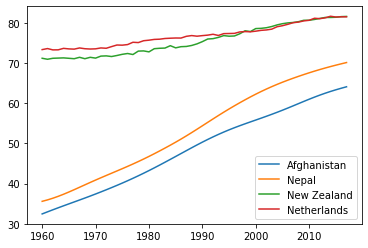

In [47]:
pl.plot(np.arange(1960,2018),life.loc['Afghanistan',"1960":"2017"])
pl.plot(np.arange(1960,2018),life.loc['Nepal',"1960":"2017"])
pl.plot(np.arange(1960,2018),life.loc['New Zealand',"1960":"2017"])
pl.plot(np.arange(1960,2018),life.loc['Netherlands',"1960":"2017"])
pl.legend(['Afghanistan','Nepal','New Zealand','Netherlands'])

Plot Rwanda separately, and explain briefly why it has that shape (hint: use wikipedia) [2 marks]

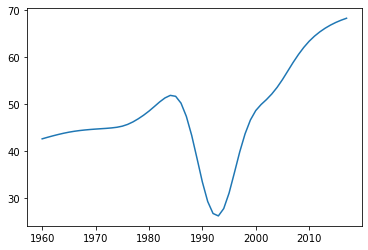

In [48]:
pl.plot(np.arange(1960,2018),life.loc['Rwanda',"1960":"2017"])

There was a nasty civil war in Rwanda at that time.

Can you detect any other countries where the life expectancy drops significantly? 

To compute this write some loops over each country and each year. If the next value is below 95% of the current value, print the name of the country.  [4 marks]

In [98]:
current = 0
detected=False
for i in life.index:
    for j in life.loc[i,"1960":"2017"]:
        if j < current*0.95:
            detected = True
        current = j
    if detected:
        print(i)
    detected=False
    current = 0

Cambodia
Rwanda


Compute the mean life expectancy for each of the countries over the whole 57 years. 
Plot a bar chart of this for the first 10 countries (alphabetic order). [4 marks]

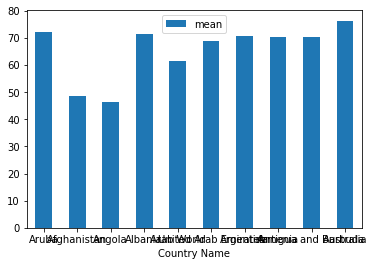

In [101]:
life['mean'] = life.mean(axis=1)
life2 = life.iloc[:10,:]
life2.reset_index(level=0, inplace=True)
ax = life2.plot.bar(x='Country Name', y='mean', rot=0)

Find the 5 countries with the highest mean life expectancy and the 5 with the lowest. You might find `life.sort_values()` helpful, as well as `pd.concat`and `life.transpose`. Plot a box and whisker plot of these countries. [4 marks]

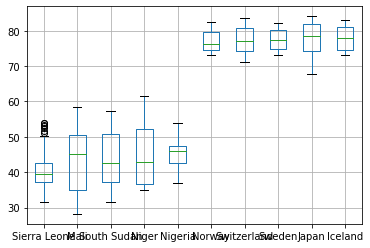

In [117]:
life = life.sort_values(['mean'],axis=0)
life2 = life.iloc[:5,3:-1]
life3 = life.iloc[-5:,3:-1]
life4 = pd.concat([life2,life3])
life4 = life4.transpose()
life4.boxplot()

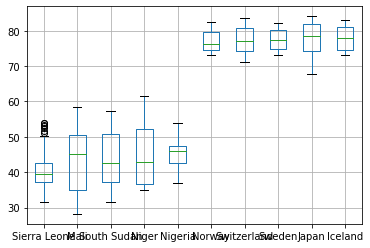